<a href="https://colab.research.google.com/github/MOOwuttichai/BSC_DPDM2023/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

In [1]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
shopping_data = pd.read_csv("/content/drive/MyDrive/BSC-dpdm23_flie/customer_shopping_data.csv")

Mounted at /content/drive


In [2]:
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

ตรวจสอบค่าก่อน missing

In [3]:
shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [120]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


##เราจะลบ price ของ records ที่เป็น cothing,cash,Metrocity เพื่อจะจำลอง missing data

ทำให้ price เป็น missing

In [27]:
shopping_new = shopping_data[shopping_data['category']=='Clothing']
shopping_new2=shopping_new[shopping_new['payment_method']=='Cash']
shopping_new3 = shopping_new2[shopping_new2['shopping_mall']=='Metrocity']
shopping_new3

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [60]:
hasmissing = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [61]:
hasmissing['price']= np.nan #ทำให้ค่ากลายเป็น missing

<ipython-input-61-e70a23699fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasmissing['price']= np.nan #ทำให้ค่ากลายเป็น missing


เเยกค่าที่ไม่ทำ missing value

In [62]:
hasmissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


In [56]:
nonmissing=shopping_data[(shopping_data['category']!='Clothing') |
              (shopping_data['payment_method']!='Cash') |
              (shopping_data['shopping_mall']!='Metrocity')]

เอาค่ากลับมารวม

In [70]:
new_shopping_data = pd.concat([hasmissing,nonmissing]).reset_index()
new_shopping_data.shape

(99457, 11)

## Example

In [83]:
new_shopping_data

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
1,382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
2,446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
3,531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
4,647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [69]:
new_shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [101]:
new_shopping_data.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,97173.000000
mean,49728.000000,43.427089,3.003429,684.423873
std,28710.907199,14.990054,1.413025,949.438067
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,40.660000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


## Fix

### 1.ignore (ลบออก)

###Quiz
* data หายไปกี่ %
* mean data รวมหลังจากเเก้ missing เป็นค่าเท่าไร

In [119]:
len(new_shopping_data)

99457

In [80]:
dropna_data=new_shopping_data.dropna()

In [118]:
dropna_data

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2284,0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
2285,1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2286,3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
2287,4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
2288,5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [87]:
100*(len(new_shopping_data)-len(dropna_data))/len(new_shopping_data)

2.2964698311833254

In [88]:
dropna_data.describe()

,index,age,quantity,price
count,97173.000000,97173.000000,97173.000000,97173.000000
mean,49719.605158,43.421671,3.003931,684.423873
std,28719.460446,14.990459,1.413123,949.438067
min,0.000000,18.000000,1.000000,5.230000
25%,24848.000000,30.000000,2.000000,40.660000
50%,49715.000000,43.000000,3.000000,203.300000
75%,74596.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


684.4238731952291

### 2.เติมด้วย unknown *เราจะเติมกับข้อมูล categorical

### 3. เติมค่าด้วย missing value

In [98]:
fillna_data = new_shopping_data.fillna(dropna_data['price'].mean())

In [99]:
fillna_data

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,2,I127801,C266599,Male,20,Clothing,1,684.423873,Cash,9/11/2021,Metrocity
1,382,I591015,C286181,Female,69,Clothing,1,684.423873,Cash,12/9/2021,Metrocity
2,446,I423124,C109593,Female,66,Clothing,1,684.423873,Cash,7/1/2023,Metrocity
3,531,I223795,C280596,Male,40,Clothing,3,684.423873,Cash,26/12/2022,Metrocity
4,647,I891465,C175833,Female,19,Clothing,1,684.423873,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [100]:
fillna_data.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,49728.000000,43.427089,3.003429,684.423873
std,28710.907199,14.990054,1.413025,938.472859
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,45.450000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


### 4.fill ด้วยกลุ่ม

* mean หลังเติมด้วยค่าเฉลี่ย Clothing
* mean หลังเติมด้วยค่าเฉลี่ย Cash
* mean หลังเติมด้วยค่าเฉลี่ย Metrocity
* mean หลังเติมด้วยค่าเฉลี่ย Cash & Metrocity

In [124]:
C_M =new_shopping_data[(new_shopping_data['payment_method'] == 'Cash') &
                  (new_shopping_data['shopping_mall'] == 'Metrocity')]

In [114]:
C_M['price'].mean()

577.9630292559318

In [122]:
fillna_data3=new_shopping_data.fillna(C_M['price'].mean())

In [123]:
fillna_data3

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,2,I127801,C266599,Male,20,Clothing,1,577.963029,Cash,9/11/2021,Metrocity
1,382,I591015,C286181,Female,69,Clothing,1,577.963029,Cash,12/9/2021,Metrocity
2,446,I423124,C109593,Female,66,Clothing,1,577.963029,Cash,7/1/2023,Metrocity
3,531,I223795,C280596,Male,40,Clothing,3,577.963029,Cash,26/12/2022,Metrocity
4,647,I891465,C175833,Female,19,Clothing,1,577.963029,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [117]:
fillna_data3.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,49728.000000,43.427089,3.003429,681.979032
std,28710.907199,14.990054,1.413025,938.608338
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,45.450000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

###สร้าง data Duplicate Data

In [125]:
willbedup = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [126]:
new_shopping_dup = pd.concat([shopping_data,willbedup])

In [127]:
new_shopping_dup.describe()

,age,quantity,price
count,101741.000000,101741.000000,101741.000000
mean,43.432264,3.002949,693.871800
std,14.989665,1.412931,933.210127
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,300.080000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [134]:
new_shopping_dup=new_shopping_dup.sort_values(by='invoice_date') #เรียงข้อมูลตามเวลา

## Example

In [135]:
new_shopping_dup[new_shopping_dup.duplicated()] #เช็กว่าข้อมูลไหนซ้ำ

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,1/1/2021,Metrocity
30645,I235671,C196703,Female,45,Clothing,2,600.16,Cash,1/1/2021,Metrocity
52134,I740632,C283467,Female,49,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
32519,I341543,C754279,Female,53,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
67018,I122424,C970402,Female,30,Clothing,1,300.08,Cash,1/1/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
82563,I301995,C734886,Female,67,Clothing,2,600.16,Cash,9/8/2022,Metrocity
90298,I422962,C183016,Female,55,Clothing,2,600.16,Cash,9/9/2021,Metrocity
63360,I180399,C286433,Female,31,Clothing,3,900.24,Cash,9/9/2021,Metrocity
86164,I473988,C714996,Female,45,Clothing,4,1200.32,Cash,9/9/2022,Metrocity


## Fix

In [138]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [140]:
from matplotlib import pyplot as plt

## Example

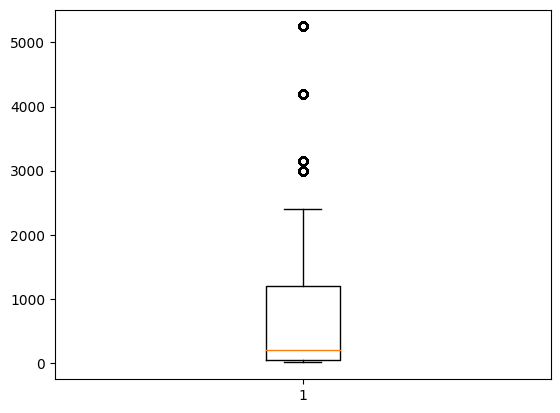

In [144]:
ret = plt.boxplot(shopping_data['price'])

## Fix

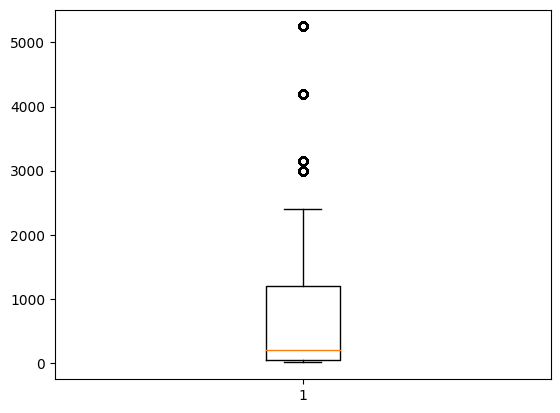

In [141]:
ret = plt.boxplot(shopping_data['price'])

In [146]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcdad849480>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcdad8499c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcdad8491e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcdad849f00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcdad84a1a0>],
 'means': []}

In [145]:
ret['fliers'][0].get_ydata().shape

(5024,)

In [148]:
ret['whiskers'][0].get_ydata() #หาเส้นmin เเละ IQR-min

array([45.45,  5.23])

In [149]:
ret['whiskers'][1].get_ydata() #หาเส้นmax เเละ IQR-max

array([1200.32, 2400.68])

In [151]:
ret['whiskers'][1].get_ydata()[1]

2400.68

In [154]:
no_outline=shopping_data[shopping_data['price'] <= 2400.68]

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcdad6c40d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcdad6c4610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcdad883790>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcdad6c4b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcdad6c4df0>],
 'means': []}

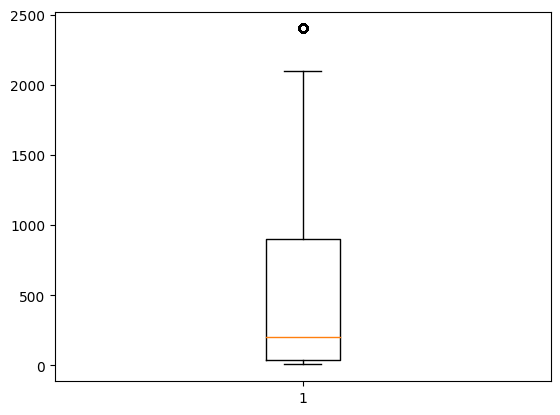

In [155]:
 plt.boxplot(no_outline['price'])

# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

## Example

## Fix

# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

## Fix